In [1]:
import pandas as pd 
stats = pd.read_csv('./data/charcters_stats.csv')
stats.head()

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
0,3-D Man,good,50,31,43,32,25,52,233
1,A-Bomb,good,38,100,17,80,17,64,316
2,Abe Sapien,good,88,14,35,42,35,85,299
3,Abin Sur,good,50,90,53,64,84,65,406
4,Abomination,bad,63,80,53,90,55,95,436


## Core Mission

In [2]:
stats.sort_values(by='Total', ascending=False).iloc[0]['Name']

'Martian Manhunter'

Alignment가 null인 row는 3개이므로 무시

In [3]:
print(stats[stats['Alignment'].isnull()])
stats = stats[~stats['Alignment'].isnull()]

           Name Alignment  Intelligence  Strength  Speed  Durability  Power  \
28   Anti-Venom       NaN            75        60     65          90     85   
98    Blackwulf       NaN            50        28      8          30     59   
560   Trickster       NaN             1         1      1           1      0   

     Combat  Total  
28       84    459  
98       25    200  
560       1      5  


전체 스텟의 합은 neutral > bad > good 인 것으로 확인된다.

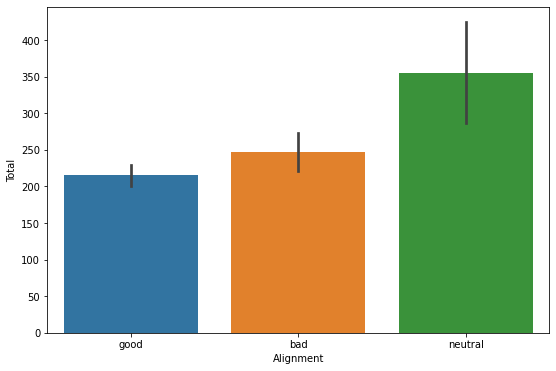

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
fig, ax = plt.subplots(1, 1, figsize=[9, 6])
sns.barplot(x='Alignment', y='Total', data=stats, ax=ax)
plt.show()

각 6가지 스텟에 대해서 그려보면, 6가지 스텟 모두 neutral > bad > good 순인 것으로 확인된다.

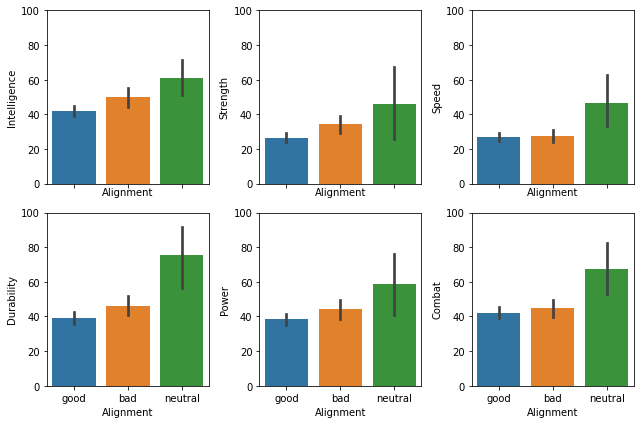

In [5]:
stats_cols = ['Intelligence', 'Strength', 'Speed', 'Durability', 'Power', 'Combat']
fig, axs = plt.subplots(2, 3, figsize=[9, 6], sharex=True)
for i, col in enumerate(stats_cols):
    sns.barplot(x='Alignment', y=col, data=stats, ax=axs[i//3][i%3])
    axs[i//3][i%3].set_ylim(0, 100)
plt.tight_layout()
plt.show()